# Clustering

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
sns.set()

# Loading The Data

In [5]:
raw_data = pd.read_csv('/home/rshubham/STUDY/udemy_ml/Section-38/S38_L256/3.01. Country clusters.csv')
data = raw_data
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [6]:
data['Language'] = data['Language'].map({'English': 0, 'French': 1, 'German': 2})
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


# Ploting tha data

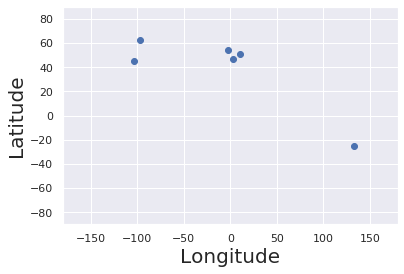

In [12]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

# Clustering according to Language

In [13]:
x = data.iloc[:,3:4]
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


In [14]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 2, 1, 0, 1], dtype=int32)

In [16]:
data_with_cluster_language = data
data_with_cluster_language['Cluster'] = identified_clusters
data_with_cluster_language

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,1
1,Canada,62.40,-96.80,0,1
2,France,46.75,2.40,1,2
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


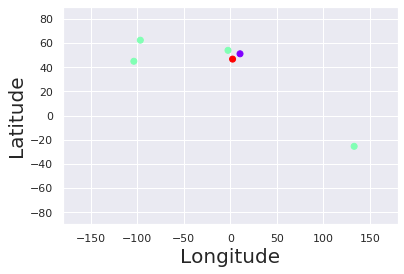

In [19]:
plt.scatter(data['Longitude'], data['Latitude'], c=data_with_cluster_language['Cluster'], cmap='rainbow')
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

# Clustering according to geolocation

In [38]:
x = data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [39]:
kmeans_geolocation = KMeans(3)
kmeans_geolocation.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
identified_clusters_geolocation = kmeans.fit_predict(x)
identified_clusters_geolocation

array([0, 0, 1, 1, 1, 2], dtype=int32)

In [44]:
data_with_cluster_geolocation = data
data_with_cluster_geolocation['Cluster'] = identified_clusters_geolocation
data_with_cluster_geolocation

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,1
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,2


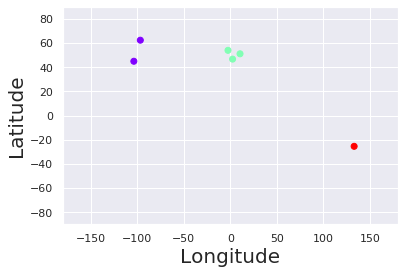

In [45]:
plt.scatter(data['Longitude'], data['Latitude'], c=data_with_cluster_geolocation['Cluster'], cmap='rainbow')
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

# Clustering according to all variables

In [46]:
x = data.iloc[:,1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [47]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [48]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 1, 1, 1, 2], dtype=int32)

In [49]:
data_with_cluster = data
data_with_cluster['Cluster'] = identified_clusters
data_with_cluster

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,1
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,2


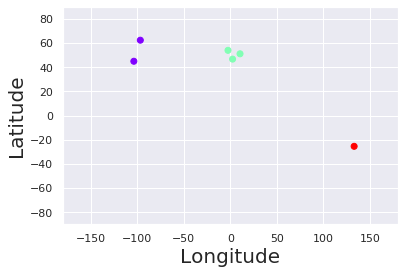

In [50]:
plt.scatter(data['Longitude'], data['Latitude'], c=data_with_cluster['Cluster'], cmap='rainbow')
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

# Selecting the number of clusters (WCSS)

In [53]:
wcss = []
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [54]:
wcss

[42605.41356666667,
 13208.95812,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

# The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

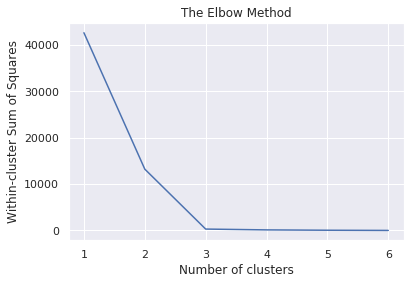

In [55]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')